In [1]:
#import libraries
import pandas as pd
import numpy as np
import random as rd
import matplotlib.pyplot as plt

In [2]:
data = pd.read_csv('Wholesale customers data.csv')
data.head()

,Channel,Region,Fresh,Milk,Grocery,Frozen,Detergents_Paper,Delicassen
0,2,3,12669,9656,7561,214,2674,1338
1,2,3,7057,9810,9568,1762,3293,1776
2,2,3,6353,8808,7684,2405,3516,7844
3,1,3,13265,1196,4221,6404,507,1788
4,2,3,22615,5410,7198,3915,1777,5185


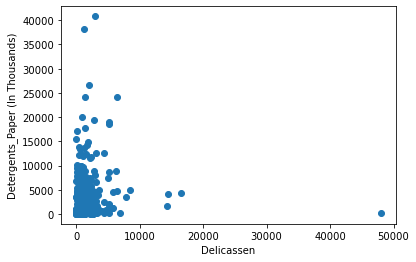

In [7]:
X = data[["Detergents_Paper","Delicassen"]]
#Visualise data points
plt.scatter(X["Delicassen"],X["Detergents_Paper"])
plt.xlabel('Delicassen')
plt.ylabel('Detergents_Paper (In Thousands)')
plt.show()

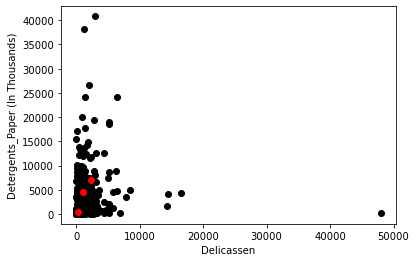

In [12]:
# Step 1 and 2 - Choose the number of clusters (k) and select random centroid for each cluster

#number of clusters
K=3

# Select random observation as centroids
Centroids = (X.sample(n=K))
plt.scatter(X["Delicassen"],X["Detergents_Paper"],c='black')
plt.scatter(Centroids["Delicassen"],Centroids["Detergents_Paper"],c='red')
plt.xlabel('Delicassen')
plt.ylabel('Detergents_Paper (In Thousands)')
plt.show()

In [14]:
# Step 3 - Assign all the points to the closest cluster centroid
# Step 4 - Recompute centroids of newly formed clusters
# Step 5 - Repeat step 3 and 4

diff = 1
j=0

while(diff!=0):
    XD=X
    i=1
    for index1,row_c in Centroids.iterrows():
        ED=[]
        for index2,row_d in XD.iterrows():
            d1=(row_c["Delicassen"]-row_d["Delicassen"])**2
            d2=(row_c["Detergents_Paper"]-row_d["Detergents_Paper"])**2
            d=np.sqrt(d1+d2)
            ED.append(d)
        X[i]=ED
        i=i+1

    C=[]
    for index,row in X.iterrows():
        min_dist=row[1]
        pos=1
        for i in range(K):
            if row[i+1] < min_dist:
                min_dist = row[i+1]
                pos=i+1
        C.append(pos)
    X["Cluster"]=C
    Centroids_new = X.groupby(["Cluster"]).mean()[["Detergents_Paper","Delicassen"]]
    if j == 0:
        diff=1
        j=j+1
    else:
        diff = (Centroids_new['Detergents_Paper'] - Centroids['Detergents_Paper']).sum() + (Centroids_new['Delicassen'] - Centroids['Delicassen']).sum()
        print(diff.sum())
    Centroids = X.groupby(["Cluster"]).mean()[["Detergents_Paper","Delicassen"]]

/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:18: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
/srv/conda/envs/notebook/lib/python3.6/site-packages/ipykernel_launcher.py:30: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy


3776.066559423456
2697.5490174976735
2666.041107435485
496.6653998528494
484.61083806422357
468.1683156995464
431.4725123670055
940.5216572225514
902.9561917288445
825.9510690432382
919.6594765713467
900.494811399738
840.1155302347391
894.9982766795353
52.41352072803704
0.0


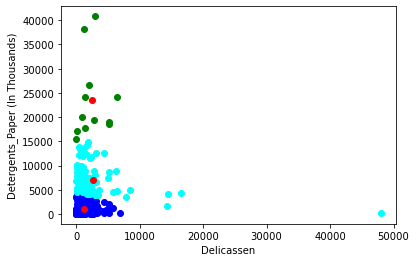

In [15]:
color=['blue','green','cyan']
for k in range(K):
    data=X[X["Cluster"]==k+1]
    plt.scatter(data["Delicassen"],data["Detergents_Paper"],c=color[k])
plt.scatter(Centroids["Delicassen"],Centroids["Detergents_Paper"],c='red')
plt.xlabel('Delicassen')
plt.ylabel('Detergents_Paper (In Thousands)')
plt.show()